In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from Module_241021 import (par0,
                           load_data_w_glob,
                           equations_NG_F,
                           equations_NGE_and_F,
                           bifurcation_diagram_of_sampled_data_relchange,
                           plot_bifurcation_diagram_gata_nanog_alpha_kmiNG
                          )

## Bifurcation diagrams

Since plotting the steady state values only at the rel change values I already had, looked too sparce, I run simulations from the same set of ics but from a more fine grained rel change array.

I am interested in the GN and GNE network for paraemter alphaGN and KmiNG

The reference Epi and PrE states are at 
 (Gata6, Nanog)=[ 1.10273171 11.46535802] 
 (Gata6, Nanog)=[13.62042978  2.41356951]

In [3]:
sample_bifur_data = False

if sample_bifur_data:
    
    # 0. load data
    GN_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GN_*csv")
    GNE_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GNE_*csv")
    
    print("Loading is DONE.")
    
    # 1. sample the bifurcation data

    # GN alphaGN
    bifurcation_diagram_of_sampled_data_relchange(df_network=GN_all,
                                                  dim=2,
                                                  model=equations_NG_F,
                                                  date="241021",
                                                  parameter="alphaGN",
                                                  parameter1="wf_G",
                                                  savefile=True
                                                 )
    print("GN DONE")
    
    # GN KmiNG
    bifurcation_diagram_of_sampled_data_relchange(df_network=GN_all,
                                                  dim=2,
                                                  model=equations_NG_F,
                                                  date="241021",
                                                  parameter="KmiNG",
                                                  parameter1="K_GN",
                                                  savefile=True
                                                 )
    
    # GNE alphaGN
    bifurcation_diagram_of_sampled_data_relchange(df_network=GNE_all,
                                                  dim=3,
                                                  model=equations_NGE_and_F,
                                                  date="241021",
                                                  parameter="alphaGN",
                                                  parameter1="wf_G",
                                                  savefile=True
                                                 )

    # GNE KmiNG
    bifurcation_diagram_of_sampled_data_relchange(df_network=GNE_all,
                                                  dim=3,
                                                  model=equations_NGE_and_F,
                                                  date="241021",
                                                  parameter="KmiNG",
                                                  parameter1="K_GN",
                                                  savefile=True
                                                 )
    print("GNE DONE")

In [4]:
# 2. load bifurcation data
GN_alphaNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GN_alphaGN_241021.csv")
GN_kimNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GN_KmiNG_241021.csv")
GNE_alphaNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GNE_alphaGN_241021.csv")
GNE_kimNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GNE_KmiNG_241021.csv")

In [5]:
# read the plots
dataframe = GN_alphaNG_df


index=-1

s = dataframe["rel change"].unique()
print(s,"\nscalefactor" ,s[index],"<br>")

mask_gata_pre = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] > 2
mask_gata_epi = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] < 2

mask_nanog_pre = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] < 4
mask_nanog_epi = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] > 4


pre_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_pre])
epi_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_epi])
pre_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_pre])
epi_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_epi])


print(f"Epi:{epi_gata6, epi_nanog}, PrE: {pre_gata6, pre_nanog}<br>")

distance = np.sqrt((epi_gata6-pre_gata6)**2+(epi_nanog-pre_nanog)**2)

print(f"Euclidian distance: {distance} <br>")

[0.2        0.2172074  0.23589527 0.25619098 0.27823288 0.3021712
 0.3281691  0.35640378 0.38706769 0.42036983 0.45653718 0.49581626
 0.5384748  0.58480355 0.63511828 0.68976194 0.74910698 0.81355789
 0.88355396 0.95957228 1.04213098 1.13179279 1.22916883 1.33492281
 1.44977555 1.57450986 1.70997595 1.85709712 2.01687616 2.19040211
 2.3788577  2.58352745 2.80580636 3.04720948 3.3093822  3.59411147
 3.90333798 4.23916941 4.60389477 5.        ] 
scalefactor 4.999999999999999 <br>
Epi:(1.001199729145171, 48.18432595338822), PrE: (65.19699925320253, 2.3006232794089474)<br>
Euclidian distance: 78.90763491327755 <br>


In [6]:
# read the plots
dataframe = GN_kimNG_df


index=21#12#28

s = dataframe["rel change"].unique()
print(s,"\nscalefactor" ,s[index],"<br>")

mask_gata_pre = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] > 6
mask_gata_epi = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] < 6

mask_nanog_pre = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] < 6
mask_nanog_epi = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] > 6


pre_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_pre])
epi_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_epi])
pre_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_pre])
epi_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_epi])

print(pre_gata6, pre_nanog, epi_gata6, epi_nanog)
print(f"Gata6-to-Nanog ratio, PrE: {pre_gata6/pre_nanog} <br>")
print(f"Gata6-to-Nanog ratio, Epi: {epi_gata6/epi_nanog} <br>")

[0.2        0.2172074  0.23589527 0.25619098 0.27823288 0.3021712
 0.3281691  0.35640378 0.38706769 0.42036983 0.45653718 0.49581626
 0.5384748  0.58480355 0.63511828 0.68976194 0.74910698 0.81355789
 0.88355396 0.95957228 1.04213098 1.13179279 1.22916883 1.33492281
 1.44977555 1.57450986 1.70997595 1.85709712 2.01687616 2.19040211
 2.3788577  2.58352745 2.80580636 3.04720948 3.3093822  3.59411147
 3.90333798 4.23916941 4.60389477 5.        ] 
scalefactor 1.1317927911527863 <br>
14.053513438531335 2.464771457807097 1.2002874431606578 11.46974399830151
Gata6-to-Nanog ratio, PrE: 5.701751127479674 <br>
Gata6-to-Nanog ratio, Epi: 0.10464814588175653 <br>


**GN, alpha**<br>
scalefactor 1.1317927911527863 <br>
Epi:(1.0917014820939444, 11.852849815729867), PrE: (14.179862776078465, 2.400740462996709)<br>
Euclidian distance: 16.14442124306041 <br>

scalefactor 4.999999999999999 <br>
Epi:(1.001199729145171, 48.18432595338822), PrE: (65.19699925320253, 2.3006232794089474)<br>
Euclidian distance: 78.90763491327755 <br>

**GN kmiNG**<br>
scalefactor 0.5384747991560215 <br>
Epi:(1.0074800380476947, 11.262800307402934), PrE: (6.91877888498833, 2.4443277647150916)<br>
Euclidian distance: 10.616445358215767 <br>

Gata6-to-Nanog ratio, PrE: 2.830544653161429 <br>
Gata6-to-Nanog ratio, Epi: 0.08945200221524725 <br>

scalefactor 2.0168761605950327 <br>
Epi:(4.644281173194556, 10.978754236055929), PrE: (14.53106470808778, 3.6487799076487937)<br>
Euclidian distance: 12.307599779036664 <br>
Gata6-to-Nanog ratio, PrE: 3.9824448379653923 <br>
Gata6-to-Nanog ratio, Epi: 0.4230244227475297 <br>


In [7]:
# 3. plot figures, pdf

plot_figures=False  # check if you want to save the figures, too.

if plot_figures:
    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_alphaNG_df,
                                                    filename_figure="GN_alphaNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_alphaNG_df,
                                                    filename_figure="GNE_alphaNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_kimNG_df,
                                                    filename_figure="GN_KmiNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_kimNG_df,
                                                    filename_figure="GNE_KmiNG",
                                                    date="241015",
                                                    savefig=True
                                                   )
    
    
plot_figures=False # pdf=False, makes png files

if plot_figures:
    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_alphaNG_df,
                                                    filename_figure="GN_alphaNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_alphaNG_df,
                                                    filename_figure="GNE_alphaNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_kimNG_df,
                                                    filename_figure="GN_KmiNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_kimNG_df,
                                                    filename_figure="GNE_KmiNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

why does the parameters that are only evaluated in the GNE network not influence the robustness conditions?

In [8]:
from scipy.integrate import solve_ivp

In [9]:
def sample_trajectories_till_steady_state(model, tmax, ic, parameters):
    
    
    sol = solve_ivp(model,(0,tmax), ic, args=[parameters])
        
    def find_time_ss(sol):
        #trajectory = []
        timepoints = []
        
        count = 0
        dcount = 5
        slope = 10 # some high number
        ss_threshold = 0.01 # convergence

        # note: in case ss isn't reached within tmax, the time condition is added.
        while sol.t[count] < sol.t[-1] and slope > ss_threshold:
            if count-dcount > 0: # ensure that the previous element exists
                # I measure the relative change in Nanog and Gata6 levels between time point i-5 and i.
                # I use the max relative change as a condition.
                slope = np.max((sol.y[:2, count]-sol.y[:2, count-dcount])/sol.y[:2, count-dcount])
            count += 1
            timepoints.append(sol.t[count])
            
        return count, timepoints#count-1, sol.t[count]
        
    count_ss, timepoints = find_time_ss(sol)
    
    return sol.y[:,0:count_ss], timepoints

In [10]:
icnanog=GNE_alphaNG_df["ic nanog"].unique()
icnanog[15]

0.5347244000266966

In [11]:
GNE_alphaNG_df[(GNE_alphaNG_df["ic gata6"]==0.1)&(GNE_alphaNG_df["ic nanog"]==icnanog[15])]["ic essrb"].unique()

array([1.445971])

In [12]:
GNE_alphaNG_df[["ic gata6", "ic nanog", "ic essrb"]]

,ic gata6,ic nanog,ic essrb
0,0.100000,0.10000,0.994172
1,0.111826,0.10000,0.994172
2,0.125050,0.10000,0.994172
3,0.139838,0.10000,0.994172
4,0.156375,0.10000,0.994172
...,...,...,...
45075,0.305788,4.47124,12.931263
45076,0.341950,4.47124,12.931263
45077,0.382388,4.47124,12.931263
45078,0.427608,4.47124,12.931263


In [13]:
par0

{'basal_N': 3.5,
 'basal_G': 1,
 'basal_E': 1,
 'wf_G': 14,
 'wf_N': 14,
 'wf_E': 12,
 'tau_G': 1,
 'tau_N': 1,
 'tau_E': 1,
 'K_GG': 1.2,
 'K_NN': 1.2,
 'K_GN': 4.2,
 'K_NG': 4.2,
 'K_FN': 1,
 'K_FE': 3,
 'K_EN': 1.2,
 'K_NE': 1.2,
 'K_NEG': 1.2,
 'K_EG': 1.2,
 'h': 4,
 'FGF': 0.85}

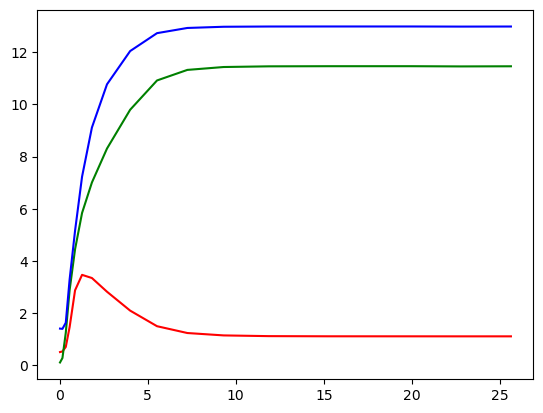

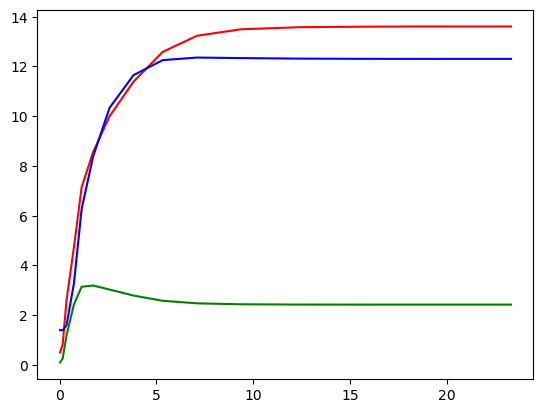

In [14]:
par0["K_EG"]=5*1.2
fig, ax = plt.subplots()
for ic in [[0.5, 0.1, 1.4]]: #pre
    pos, time = sample_trajectories_till_steady_state(equations_NGE_and_F, 200, ic, par0)

    ax.plot(time, pos[0], color="red",label="[GATA6]", alpha=1)
    ax.plot(time, pos[1], color="green",label="[NANOG]", alpha=1)
    ax.plot(time, pos[2], color="blue",label="[ESRRB]", alpha=1)
    
    
par0["K_EG"]=0.2*1.2
fig, ax = plt.subplots()
for ic in [[0.5, 0.1, 1.4]]: #pre
    pos, time = sample_trajectories_till_steady_state(equations_NGE_and_F, 200, ic, par0)

    ax.plot(time, pos[0], color="red",label="[GATA6]", alpha=1)
    ax.plot(time, pos[1], color="green",label="[NANOG]", alpha=1)
    ax.plot(time, pos[2], color="blue",label="[ESRRB]", alpha=1)

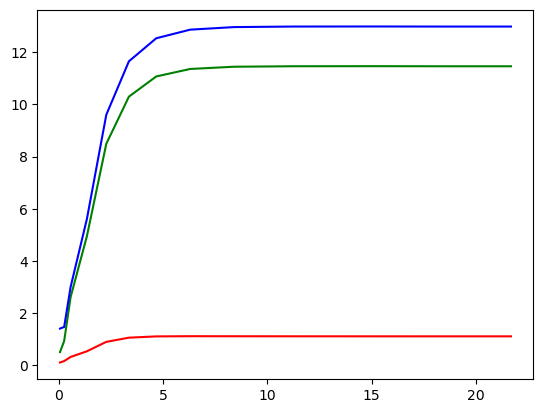

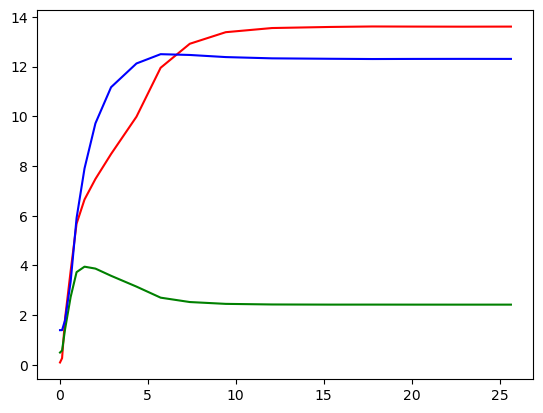

In [15]:
par0["K_EG"]=5*1.2
fig, ax = plt.subplots()
for ic in [[0.1, 0.5, 1.4]]: #epi
    pos, time = sample_trajectories_till_steady_state(equations_NGE_and_F, 200, ic, par0)

    ax.plot(time, pos[0], color="red",label="[GATA6]", alpha=1)
    ax.plot(time, pos[1], color="green",label="[NANOG]", alpha=1)
    ax.plot(time, pos[2], color="blue",label="[ESRRB]", alpha=1)
    
par0["K_EG"]=0.2*1.2
fig, ax = plt.subplots()
for ic in [[0.1, 0.5, 1.4]]: #epi
    pos, time = sample_trajectories_till_steady_state(equations_NGE_and_F, 200, ic, par0)

    ax.plot(time, pos[0], color="red",label="[GATA6]", alpha=1)
    ax.plot(time, pos[1], color="green",label="[NANOG]", alpha=1)
    ax.plot(time, pos[2], color="blue",label="[ESRRB]", alpha=1)